#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 10
**CH10B Finding a good deal among hotels with multiple regression**

using the hotels-vienna dataset

version 1.0 2021-05-05

In [ ]:
import os
from pathlib import Path
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")


In [44]:
hotels = pd.read_csv(os.path.join("/workspaces/codespaces-jupyter/data/hotels-europe_features.csv"))
price = pd.read_csv(os.path.join("/workspaces/codespaces-jupyter/data/hotels-europe_price.csv"))
hotels = hotels.merge(price, on="hotel_id", how="left")

In [45]:
hotels["accommodation_type"].value_counts()

accommodation_type
Hotel                  100722
Apartment               16992
Guest House              9927
Bed and breakfast        6316
Hostel                   6226
Apart-hotel              3672
Vacation home Condo      1536
Pension                  1084
Inn                      1010
Country House              89
Palace                     67
Villa                      64
Caravan Park               60
Resort                     60
House boat                 31
Pousada                    28
Motel                      25
Cabin / Lodge              14
Cottage                    12
Chalet                     11
All inclusive               5
Castle                      5
Name: count, dtype: int64

In [46]:
hotels.columns

Index(['hotel_id', 'city', 'distance', 'stars', 'rating', 'country',
       'city_actual', 'rating_reviewcount', 'center1label', 'center2label',
       'neighbourhood', 'ratingta', 'ratingta_count', 'distance_alter',
       'accommodation_type', 'price', 'offer', 'offer_cat', 'year', 'month',
       'weekend', 'holiday', 'nnights', 'scarce_room'],
      dtype='object')

In [47]:
hotels = hotels.loc[
    lambda x: (x["accommodation_type"] == "Hotel")
    & (x["city_actual"] == "Rome")
    & (x["stars"] >= 3)
    & (x["stars"] <= 4)
    #& (x["price"] <= 600)
    & (x["stars"].notnull())
]

In [48]:
len(hotels)

4138

In [49]:
hotels["rating"].describe()

count    4112.000000
mean        3.884655
std         0.443725
min         2.500000
25%         3.700000
50%         3.900000
75%         4.100000
max         4.800000
Name: rating, dtype: float64

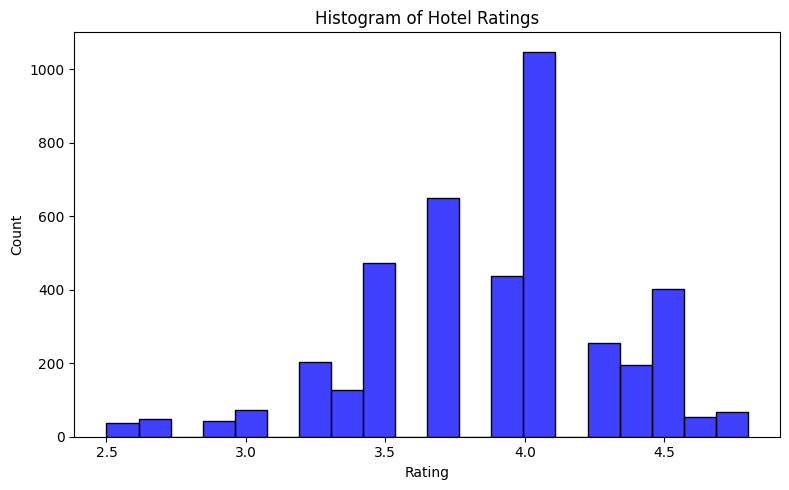

In [50]:
plt.figure(figsize=(8, 5))
sns.histplot(hotels["rating"], bins=20, color="blue", edgecolor="black")
plt.title("Histogram of Hotel Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [55]:
hotels.dropna(inplace=True)
hotels
hotels["rating"].describe()

count    4112.000000
mean        3.884655
std         0.443725
min         2.500000
25%         3.700000
50%         3.900000
75%         4.100000
max         4.800000
Name: rating, dtype: float64

In [60]:
hotels["high_rating"] = np.where(hotels["rating"] >= 4, 1, 0)
hotels["high_rating"].value_counts()

high_rating
0    2089
1    2023
Name: count, dtype: int64

In [63]:
hotels.head().T

,111312,111313,111314,111315,111316
hotel_id,15166,15166,15166,15166,15167
city,Rome,Rome,Rome,Rome,Rome
distance,3.2,3.2,3.2,3.2,3.2
stars,4.0,4.0,4.0,4.0,4.0
rating,3.5,3.5,3.5,3.5,3.5
country,Italy,Italy,Italy,Italy,Italy
city_actual,Rome,Rome,Rome,Rome,Rome
rating_reviewcount,19.0,19.0,19.0,19.0,19.0
center1label,City centre,City centre,City centre,City centre,City centre
center2label,Palazzo Madama,Palazzo Madama,Palazzo Madama,Palazzo Madama,Grotta del Bue Marino


### Linear Probability

In [ ]:
# does distance affect probablity of being high rated hotel?

lpm_hr1 = smf.ols("high_rating ~ distance", data=hotels).fit(cov_type="HC1")
lpm_hr1.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            high_rating   R-squared:                       0.030
 Model:                            OLS   Adj. R-squared:                  0.029
 Method:                 Least Squares   F-statistic:                     194.8
 Date:                Wed, 16 Jul 2025   Prob (F-statistic):           2.72e-43
 Time:                        18:18:10   Log-Likelihood:                -2922.2
 No. Observations:                4112   AIC:                             5848.
 Df Residuals:                    4110   BIC:                             5861.
 Df Model:                           1                                         
 Covariance Type:                  HC1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

In [69]:
# does stars affect probablity of being high rated hotel?

lpm_hr2 = smf.ols("high_rating ~ stars", data=hotels).fit(cov_type="HC1")
lpm_hr2.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            high_rating   R-squared:                       0.019
 Model:                            OLS   Adj. R-squared:                  0.019
 Method:                 Least Squares   F-statistic:                     81.02
 Date:                Wed, 16 Jul 2025   Prob (F-statistic):           3.34e-19
 Time:                        18:19:29   Log-Likelihood:                -2943.8
 No. Observations:                4112   AIC:                             5892.
 Df Residuals:                    4110   BIC:                             5904.
 Df Model:                           1                                         
 Covariance Type:                  HC1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

In [70]:
# does price affect probablity of being high rated hotel?

lpm_hr3 = smf.ols("high_rating ~ price", data=hotels).fit(cov_type="HC1")
lpm_hr3.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            high_rating   R-squared:                       0.038
 Model:                            OLS   Adj. R-squared:                  0.038
 Method:                 Least Squares   F-statistic:                     195.6
 Date:                Wed, 16 Jul 2025   Prob (F-statistic):           1.91e-43
 Time:                        18:20:15   Log-Likelihood:                -2903.8
 No. Observations:                4112   AIC:                             5812.
 Df Residuals:                    4110   BIC:                             5824.
 Df Model:                           1                                         
 Covariance Type:                  HC1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

In [73]:
# commine all

lpm_hr4 = smf.ols("high_rating ~ distance + price + stars", data=hotels).fit(cov_type="HC1")
lpm_hr4.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            high_rating   R-squared:                       0.071
 Model:                            OLS   Adj. R-squared:                  0.070
 Method:                 Least Squares   F-statistic:                     144.3
 Date:                Wed, 16 Jul 2025   Prob (F-statistic):           6.35e-89
 Time:                        18:21:17   Log-Likelihood:                -2832.3
 No. Observations:                4112   AIC:                             5673.
 Df Residuals:                    4108   BIC:                             5698.
 Df Model:                           3                                         
 Covariance Type:                  HC1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

### Logit Model

In [75]:
# creating matrixes for regressions

y1, X1 = dmatrices("high_rating ~ distance",hotels)
y2, X2 = dmatrices("high_rating ~ price",hotels)
y3, X3 = dmatrices("high_rating ~ stars",hotels)
y4, X4 = dmatrices("high_rating ~ distance + price + rating",hotels)

In [ ]:
# GLM logit
logit1 = sm.GLM(y1, X1, family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logit1 = logit.fit()


logit2 = sm.GLM(y2, X2, family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logit2 = logit2.fit()


logit3 = sm.GLM(y3, X3, family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logit3 = logit3.fit()


logit4 = sm.GLM(y4, X4, family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logit4 = logit4.fit()


In [82]:
from sklearn.metrics import brier_score_loss

# Get predicted probabilities for each model
probs1 = logit1.predict(X1)
probs2 = logit2.predict(X2)
probs3 = logit3.predict(X3)
probs4 = logit4.predict(X4)

# True labels
y_true = y1.ravel()

# Calculate Brier scores
brier1 = brier_score_loss(y_true, probs1)
brier2 = brier_score_loss(y_true, probs2)
brier3 = brier_score_loss(y_true, probs3)
brier4 = brier_score_loss(y_true, probs4)

brier1, brier2, brier3, brier4

(np.float64(0.24252460191159034),
 np.float64(0.23943876472078562),
 np.float64(0.24510257698808405),
 np.float64(1.0431723178816166e-24))

In [84]:
logit2.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:            high_rating   No. Observations:                 4112
 Model:                            GLM   Df Residuals:                     4110
 Model Family:                Binomial   Df Model:                            1
 Link Function:                  logit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                -2762.7
 Date:                Wed, 16 Jul 2025   Deviance:                       5525.5
 Time:                        18:30:51   Pearson chi2:                 4.14e+03
 No. Iterations:                     4   Pseudo R-squ. (CS):            0.04141
 Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

### Probit Model

In [85]:
# GLM logit
probit1 = sm.GLM(y1, X1, family=sm.families.Binomial(link=sm.genmod.families.links.probit()))
probit1 = probit1.fit()


probit2 = sm.GLM(y2, X2, family=sm.families.Binomial(link=sm.genmod.families.links.probit()))
probit2 = probit2.fit()


probit3 = sm.GLM(y3, X3, family=sm.families.Binomial(link=sm.genmod.families.links.probit()))
probit3 = probit3.fit()


probit4 = sm.GLM(y4, X4, family=sm.families.Binomial(link=sm.genmod.families.links.probit()))
probit4 = probit4.fit()

In [86]:
probit1.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:            high_rating   No. Observations:                 4112
 Model:                            GLM   Df Residuals:                     4110
 Model Family:                Binomial   Df Model:                            1
 Link Function:                 probit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                -2783.7
 Date:                Wed, 16 Jul 2025   Deviance:                       5567.5
 Time:                        18:42:49   Pearson chi2:                 4.10e+03
 No. Iterations:                     4   Pseudo R-squ. (CS):            0.03158
 Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

In [88]:
probit2.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:            high_rating   No. Observations:                 4112
 Model:                            GLM   Df Residuals:                     4110
 Model Family:                Binomial   Df Model:                            1
 Link Function:                 probit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                -2764.0
 Date:                Wed, 16 Jul 2025   Deviance:                       5528.0
 Time:                        18:43:27   Pearson chi2:                 4.14e+03
 No. Iterations:                     4   Pseudo R-squ. (CS):            0.04082
 Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

In [89]:
probit3.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:            high_rating   No. Observations:                 4112
 Model:                            GLM   Df Residuals:                     4110
 Model Family:                Binomial   Df Model:                            1
 Link Function:                 probit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                -2809.8
 Date:                Wed, 16 Jul 2025   Deviance:                       5619.6
 Time:                        18:43:37   Pearson chi2:                 4.11e+03
 No. Iterations:                     4   Pseudo R-squ. (CS):            0.01921
 Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

In [91]:
probit4.summary(),

(<class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:            high_rating   No. Observations:                 4112
 Model:                            GLM   Df Residuals:                     4108
 Model Family:                Binomial   Df Model:                            3
 Link Function:                 probit   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                    nan
 Date:                Wed, 16 Jul 2025   Deviance:                   3.2870e-09
 Time:                        18:43:51   Pearson chi2:                 1.64e-09
 No. Iterations:                    30   Pseudo R-squ. (CS):                nan
 Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

### Marginal Differencies

In [97]:
probit_margef_results1 = probit1.get_margeff()
print(probit_margef_results1.summary())

probit_margef_results2 = probit2.get_margeff()
print(probit_margef_results2.summary())

probit_margef_results3 = probit3.get_margeff()
print(probit_margef_results3.summary())

probit_margef_results4 = probit4.get_margeff()
print(probit_margef_results4.summary())



         GLM Marginal Effects        
Dep. Variable:            high_rating
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
distance      -0.0438      0.004    -11.439      0.000      -0.051      -0.036
         GLM Marginal Effects        
Dep. Variable:            high_rating
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
price          0.0006   4.83e-05     12.676      0.000       0.001       0.001
         GLM Marginal Effects        
Dep. Variable:            high_rating
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025    

### Maximum Likelihood

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression

# 1. Generate synthetic data
np.random.seed(0)
n = 100
x = np.random.normal(0, 1, n)
true_beta0 = -1
true_beta1 = 2
logit = true_beta0 + true_beta1 * x
p = 1 / (1 + np.exp(-logit))
y = np.random.binomial(1, p)

# 2. Define negative log-likelihood function for logistic regression
def neg_log_likelihood(beta):
    beta0, beta1 = beta
    linear_term = beta0 + beta1 * x
    log_likelihood = y * np.log(1 / (1 + np.exp(-linear_term))) + \
                     (1 - y) * np.log(1 - 1 / (1 + np.exp(-linear_term)))
    return -np.sum(log_likelihood)

# 3. Minimize the negative log-likelihood to find MLE
result = minimize(neg_log_likelihood, [0, 0])
beta_mle = result.x

print("MLE coefficients:")
print(f"Intercept (beta0): {beta_mle[0]:.4f}")
print(f"Slope (beta1): {beta_mle[1]:.4f}")

# 4. Compare with sklearn's LogisticRegression
model = LogisticRegression()
model.fit(x.reshape(-1, 1), y)

print("\nSklearn coefficients:")
print(f"Intercept: {model.intercept_[0]:.4f}")
print(f"Slope: {model.coef_[0][0]:.4f}")


MLE coefficients:
Intercept (beta0): -0.9662
Slope (beta1): 1.8991

Sklearn coefficients:
Intercept: -0.8946
Slope: 1.6659


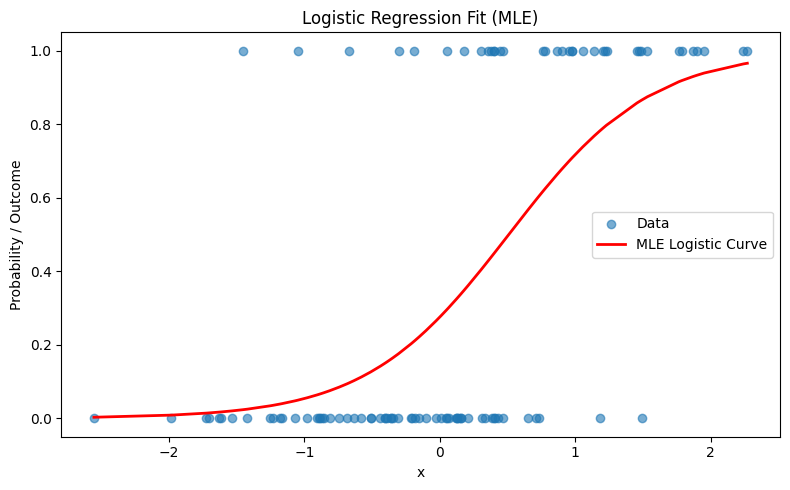

In [4]:
# Plot the data and the fitted logistic regression curve (MLE)
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Data", alpha=0.6)

# Sort x for a smooth curve
x_sorted = np.sort(x)
logit_curve = beta_mle[0] + beta_mle[1] * x_sorted
p_curve = 1 / (1 + np.exp(-logit_curve))
plt.plot(x_sorted, p_curve, color="red", label="MLE Logistic Curve", linewidth=2)

plt.xlabel("x")
plt.ylabel("Probability / Outcome")
plt.title("Logistic Regression Fit (MLE)")
plt.legend()
plt.tight_layout()
plt.show()